<a href="https://colab.research.google.com/github/DLPY/Unsupervised-Learning-Session-2/blob/main/Local_Outlier_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd

pct = [.0001,.1,.2]
amounts = [1000, 2000, 3000]
charges = pd.DataFrame()

for i in range(0, 1000):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * .04 * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

for i in range(0, 10):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * random.choice(pct) * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

In [ ]:
charges

,Amount,Charge
0,3128.862282,123.302127
0,3048.995371,127.943704
0,1944.386987,76.426449
0,2042.611385,81.136594
0,977.525836,37.760016
...,...,...
0,3043.631583,317.111315
0,1033.016561,106.351638
0,1906.522638,187.174231
0,1002.766736,190.597807


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df=(charges-charges.mean())/charges.std()

clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
charges['LOF'] = results.tolist()
charges['PCT'] = charges['Charge'] / charges['Amount']

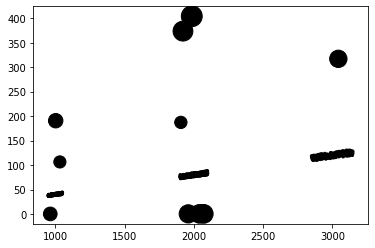

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(charges.Amount, charges.Charge, c='black', s=charges.LOF * -5)
plt.show()


In [ ]:
charges.query('LOF < -2')

,Amount,Charge,LOF,PCT
0,1960.250865,0.201294,-66.491634,0.000103
0,1921.756063,373.689453,-78.570288,0.194452
0,1985.437399,404.143643,-87.027346,0.203554
0,963.537466,0.093481,-37.427041,0.000097
0,2071.683494,0.207649,-70.345781,0.000100
0,3043.631583,317.111315,-60.178128,0.104188
0,1033.016561,106.351638,-29.591414,0.102953
0,1906.522638,187.174231,-30.280262,0.098176
0,1002.766736,190.597807,-41.598920,0.190072
0,2041.324663,0.204468,-69.264209,0.000100
